In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../outputs/eci_software_2020_2023.csv',sep=';')
df['rca']=df.rca.fillna(0)
RU = df[df['iso2_code']=='RU']
df['ihs_rca']=df['rca'].map(np.arcsinh)
ubiquity_order = df[df['year']==2020][["language", "ubiquity"]].drop_duplicates().sort_values(
    by="ubiquity", ascending=False)["language"].to_list()
df = df[df['language'].isin(ubiquity_order)]

In [7]:
df.shape

(85280, 15)

In [8]:
df.language.unique()

array(['ANTLR', 'ASP.NET', 'Ada', 'Apex', 'AppleScript', 'Assembly',
       'AutoHotkey', 'Awk', 'Batchfile', 'Blade', 'Brainfuck',
       'Brightscript', 'C', 'C#', 'C++', 'CMake', 'CSS', 'Clojure',
       'CoffeeScript', 'Common Lisp', 'Crystal', 'Cuda', 'D',
       'DIGITAL Command Language', 'DTrace', 'Dart', 'Dockerfile',
       'Elixir', 'Emacs Lisp', 'Erlang', 'F#', 'Factor', 'Forth',
       'Fortran', 'FreeMarker', 'G-code', 'GAP', 'GDB', 'GDScript',
       'GLSL', 'Game Maker Language', 'Gherkin', 'Gnuplot', 'Go',
       'Groovy', 'HCL', 'HLSL', 'HTML', 'Hack', 'Haml', 'Handlebars',
       'Haskell', 'HyPhy', 'IDL', 'Inno Setup', 'Java', 'JavaScript',
       'Julia', 'Jupyter Notebook', 'Kotlin', 'LLVM', 'LOLCODE', 'Less',
       'Lex', 'Lua', 'M', 'M4', 'MATLAB', 'Makefile', 'Mako',
       'Mathematica', 'Meson', 'NASL', 'NCL', 'NSIS', 'Nemerle', 'Nix',
       'OCaml', 'Objective-C', 'Objective-C++', 'OpenSCAD', 'PHP',
       'PLSQL', 'PLpgSQL', 'Pascal', 'Pawn', 'Perl', 'Pos

In [9]:
#df=df[df['language'].map(RU.groupby('language')['rca'].max()!=0)]
#df.shape

In [10]:
RU = df[df['iso2_code']=='RU']
ME = df[df['iso2_code']=='ME']
AM = df[df['iso2_code']=='AM']
GE = df[df['iso2_code']=='GE']


In [12]:
df['rca_bin']=df['rca'].map(lambda x: 1 if x>=1 else 0)

In [31]:
rdf=df.groupby(['iso2_code','language','year'])['rca_bin'].mean().unstack(2).fillna(0).diff(
    axis=1,periods=1).reset_index()

In [32]:
rdf

year,iso2_code,language,2020,2021,2022,2023
0,AD,ANTLR,NaN,0.0,0.0,0.0
1,AD,ASP.NET,NaN,0.0,0.0,0.0
2,AD,Ada,NaN,0.0,0.0,0.0
3,AD,Apex,NaN,0.0,0.0,0.0
4,AD,AppleScript,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...
22636,ZW,Vue,NaN,0.0,0.0,0.0
22637,ZW,XS,NaN,0.0,0.0,0.0
22638,ZW,XSLT,NaN,0.0,0.0,0.0
22639,ZW,Yacc,NaN,0.0,0.0,0.0


In [39]:
rdf[rdf['iso2_code']=='RU'][2021].value_counts().sort_index(),\
    rdf[rdf['iso2_code']=='GE'][2021].value_counts().sort_index(),\
rdf[rdf['iso2_code']=='AM'][2021].value_counts().sort_index(),\
rdf[rdf['iso2_code']=='CY'][2021].value_counts().sort_index(),\
rdf[rdf['iso2_code']=='ME'][2021].value_counts().sort_index()


(-1.0     10
  0.0    123
  1.0      6
 Name: 2021, dtype: int64,
 -1.0      1
  0.0    136
  1.0      2
 Name: 2021, dtype: int64,
 -1.0      1
  0.0    137
  1.0      1
 Name: 2021, dtype: int64,
 -1.0      1
  0.0    137
  1.0      1
 Name: 2021, dtype: int64,
 0.0    138
 1.0      1
 Name: 2021, dtype: int64)

In [40]:
rdf[rdf['iso2_code']=='RU'][2022].value_counts().sort_index(),\
    rdf[rdf['iso2_code']=='GE'][2022].value_counts().sort_index(),\
rdf[rdf['iso2_code']=='AM'][2022].value_counts().sort_index(),\
rdf[rdf['iso2_code']=='CY'][2022].value_counts().sort_index(),\
rdf[rdf['iso2_code']=='ME'][2022].value_counts().sort_index()


(-1.0     20
  0.0    115
  1.0      4
 Name: 2022, dtype: int64,
 -1.0      1
  0.0    131
  1.0      7
 Name: 2022, dtype: int64,
 -1.0      1
  0.0    132
  1.0      6
 Name: 2022, dtype: int64,
 0.0    132
 1.0      7
 Name: 2022, dtype: int64,
 0.0    129
 1.0     10
 Name: 2022, dtype: int64)

In [47]:
ru_lost=list(rdf[(rdf['iso2_code']=='RU')&(rdf[2022]==-1)].language)
me_win=list(rdf[(rdf['iso2_code']=='ME')&(rdf[2022]==1)].language)
ge_win=list(rdf[(rdf['iso2_code']=='GE')&(rdf[2022]==1)].language)
am_win=list(rdf[(rdf['iso2_code']=='AM')&(rdf[2022]==1)].language)
cy_win=list(rdf[(rdf['iso2_code']=='CY')&(rdf[2022]==1)].language)

In [53]:
print(ru_lost)

print(me_win)
print(ge_win)
print(am_win)
print(cy_win)

['ANTLR', 'AppleScript', 'Assembly', 'Common Lisp', 'Erlang', 'Lex', 'Lua', 'M4', 'NSIS', 'PLSQL', 'PostScript', 'PowerShell', 'Raku', 'Roff', 'Scala', 'SmPL', 'Solidity', 'Standard ML', 'Visual Basic .NET', 'Yacc']
['C', 'C#', 'C++', 'Dockerfile', 'Java', 'Makefile', 'PHP', 'Ruby', 'SCSS', 'TypeScript']
['Dockerfile', 'Go', 'HCL', 'Lua', 'Rust', 'Smarty', 'Solidity']
['CMake', 'Dockerfile', 'Go', 'Less', 'Makefile', 'Objective-C']
['Batchfile', 'CMake', 'Go', 'Kotlin', 'Objective-C', 'Rust', 'Swift']


In [55]:
set(ru_lost).intersection(me_win),set(ru_lost).intersection(ge_win),set(ru_lost).intersection(am_win),\
set(ru_lost).intersection(cy_win)

(set(), {'Lua', 'Solidity'}, set(), set())

In [41]:
rdf[rdf['iso2_code']=='RU'][2023].value_counts().sort_index(),\
    rdf[rdf['iso2_code']=='GE'][2023].value_counts().sort_index(),\
rdf[rdf['iso2_code']=='AM'][2023].value_counts().sort_index(),\
rdf[rdf['iso2_code']=='CY'][2023].value_counts().sort_index(),\
rdf[rdf['iso2_code']=='ME'][2023].value_counts().sort_index()


(-1.0      8
  0.0    129
  1.0      2
 Name: 2023, dtype: int64,
 -1.0      4
  0.0    132
  1.0      3
 Name: 2023, dtype: int64,
 -1.0      2
  0.0    132
  1.0      5
 Name: 2023, dtype: int64,
 -1.0      2
  0.0    137
 Name: 2023, dtype: int64,
 -1.0      2
  0.0    136
  1.0      1
 Name: 2023, dtype: int64)

In [35]:
rdf[rdf['iso2_code']=='RU'][2023].value_counts()

 0.0    129
-1.0      8
 1.0      2
Name: 2023, dtype: int64

In [ ]:
for y in [2021,2022,2023]:
    v1=RU.groupby(['year','language'])['ihs_rca'].mean().unstack(0).diff(axis=1).fillna(0)[y]
    v2=ME.groupby(['year','language'])['ihs_rca'].mean().unstack(0).diff(axis=1).fillna(0)[y]
    print(np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

In [5]:
for y in [2021,2022,2023]:
    v1=RU.groupby(['year','language'])['ihs_rca'].mean().unstack(0).diff(axis=1).fillna(0)[y]
    v2=ME.groupby(['year','language'])['ihs_rca'].mean().unstack(0).diff(axis=1).fillna(0)[y]
    print(np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

0.027116461137837115
0.004690125874146308
-0.03673018100587639


In [323]:
np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))


-0.03673018100587639

In [324]:
ME.groupby(['year','language'])['ihs_rca'].mean().unstack(0).diff(axis=1)[2023].sort_values().dropna()

language
C++          -0.309957
C            -0.291705
Ruby         -0.243001
C#           -0.210710
PHP          -0.167037
                ...   
CSS           0.040079
JavaScript    0.044255
Dockerfile    0.072009
Shell         0.082673
Kotlin        1.401260
Name: 2023, Length: 138, dtype: float64

In [325]:
GE.groupby(['year','language'])['ihs_rca'].mean().unstack(0).diff(axis=1)[2023].sort_values().dropna().tail(10)

language
SCSS             0.023804
Dockerfile       0.026027
C#               0.045694
CSS              0.057198
HTML             0.061873
Vue              0.148537
Assembly         0.555433
HLSL             0.934836
ShaderLab        0.978184
Objective-C++    0.983031
Name: 2023, dtype: float64

In [326]:
AM.groupby(['year','language'])['ihs_rca'].mean().unstack(0).diff(axis=1)[2023].sort_values().dropna().tail(10)

language
C++                 0.082385
Python              0.087657
Jupyter Notebook    0.115357
Makefile            0.134120
Rust                0.734629
Lua                 0.739452
Perl                0.970755
HCL                 1.027103
Roff                1.115875
Objective-C++       1.259487
Name: 2023, dtype: float64

In [327]:
RU.groupby(['year','language'])['ihs_rca'].mean().unstack(0).diff(axis=1)[2023].sort_values().head(30)

language
OpenSCAD        -1.112507
Thrift          -0.648397
Haml            -0.214765
Solidity        -0.194458
Swift           -0.159313
Standard ML     -0.154682
DTrace          -0.152987
PLSQL           -0.149233
Haskell         -0.142252
Common Lisp     -0.132652
QML             -0.117655
Objective-C++   -0.107083
Erlang          -0.106213
Twig            -0.101537
Objective-C     -0.100267
AppleScript     -0.099386
XSLT            -0.098247
Kotlin          -0.094562
Rust            -0.091045
Groovy          -0.090769
ANTLR           -0.090258
TSQL            -0.089271
Meson           -0.087523
Svelte          -0.084070
Elixir          -0.076240
CoffeeScript    -0.075753
GDB             -0.075511
PureBasic       -0.074880
Ada             -0.074623
OCaml           -0.071520
Name: 2023, dtype: float64

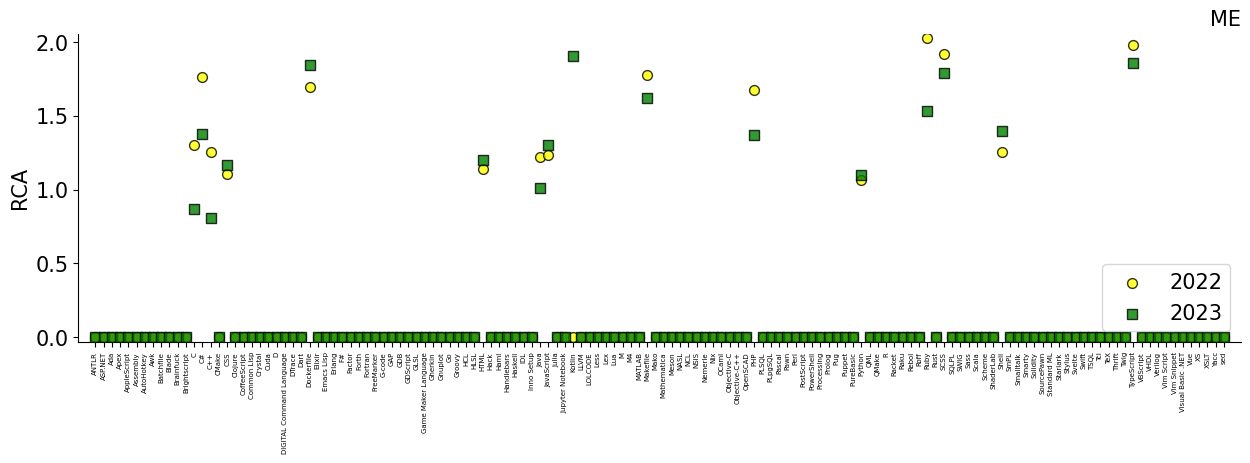

In [328]:
yvalues='rca'
x_categories= 'language'
CC='ME'
fontsize=15
dfc = df[df["iso2_code"]==CC]

fig, ax = plt.subplots(1,1, figsize=(15,4))

for y in [2022,2023]:
    if y ==2021:
        shape='v'
        color='red'
        label='2021'
    elif y == 2022:
        shape = 'o'
        color='yellow'
        label='2022'
    else:
        shape = 's'
        color='green'
        label='2023'
    dfcy = dfc[dfc['year']==y]
    ax.scatter(dfcy[x_categories], dfcy[yvalues], color=color, marker=shape,
               s=50, zorder=4,edgecolors='black',alpha=.8,label=label)
    #ax.vlines(dfcy[x_categories], ymin=0, ymax=dfcy[yvalues],color=color)
    ax.set_title(CC,size=fontsize,loc='right')
    ax.tick_params("x", labelsize=(fontsize-10), rotation=90)
    ax.tick_params("y", labelsize=(fontsize))
    ax.margins(0.015, tight=True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel("RCA", size=fontsize)
    plt.legend(loc='lower right',prop={'size':15})



In [329]:
mm['chg']=mm['language'].map(chg)

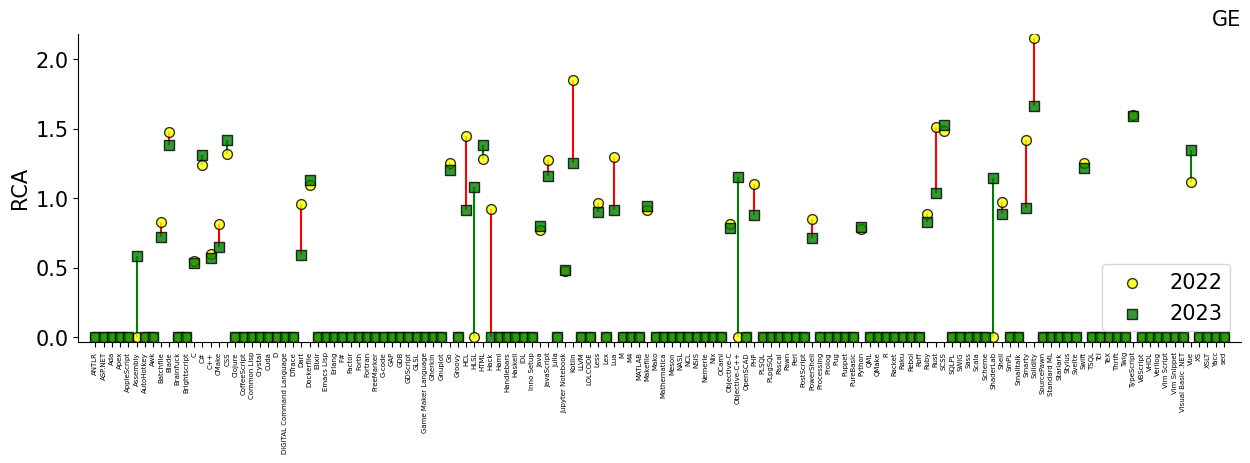

In [330]:
yvalues='rca'
x_categories= 'language'
CC='GE'
fontsize=15
dfc = df[df["iso2_code"]==CC]
years=[2022,2023]

mm=dfc[dfc['year'].isin(years)].groupby('language')['rca'].agg(['min','max']).reset_index()
chg=dict(dfc[dfc['year'].isin(years)].groupby(['language','year']).rca.mean().unstack(1).diff(axis=1)[2023]>0)
mm['chg']=mm['language'].map(chg)
pos = mm[mm['chg']==True]
neg = mm[mm['chg']==False]

fig, ax = plt.subplots(1,1, figsize=(15,4))

for y in years:
    if y ==2021:
        shape='v'
        color='red'
        label='2021'
    elif y == 2022:
        shape = 'o'
        color='yellow'
        label='2022'
    else:
        shape = 's'
        color='green'
        label='2023'
    dfcy = dfc[dfc['year']==y]
    ax.scatter(dfcy[x_categories], dfcy[yvalues], color=color, marker=shape,
               s=50, zorder=4,edgecolors='black',alpha=.8,label=label)


ax.vlines(pos['language'], ymin=pos['min'], ymax=pos['max'],color='green')
ax.vlines(neg['language'], ymin=neg['min'], ymax=neg['max'],color='red')
ax.set_title(CC,size=fontsize,loc='right')
ax.tick_params("x", labelsize=(fontsize-10), rotation=90)
ax.tick_params("y", labelsize=(fontsize))
ax.margins(0.015, tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("RCA", size=fontsize)
plt.legend(loc='lower right',prop={'size':15})



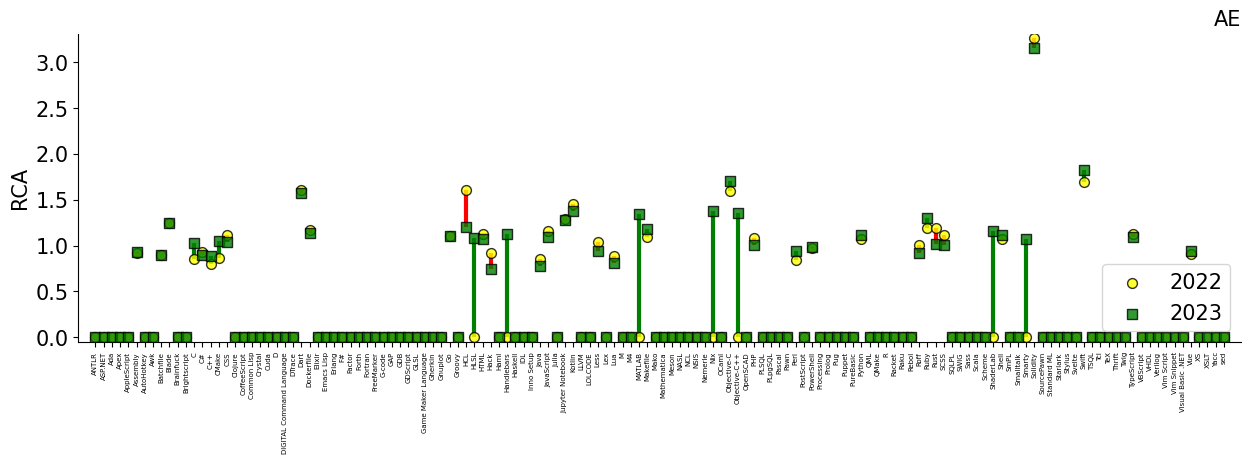

In [331]:
yvalues='rca'
x_categories= 'language'
CC='AE'
fontsize=15
dfc = df[df["iso2_code"]==CC]
years=[2022,2023]

mm=dfc[dfc['year'].isin(years)].groupby('language')['rca'].agg(['min','max']).reset_index()
chg=dict(dfc[dfc['year'].isin(years)].groupby(['language','year']).rca.mean().unstack(1).diff(axis=1)[2023]>0)
mm['chg']=mm['language'].map(chg)
pos = mm[mm['chg']==True]
neg = mm[mm['chg']==False]

fig, ax = plt.subplots(1,1, figsize=(15,4))

for y in years:
    if y ==2021:
        shape='v'
        color='red'
        label='2021'
    elif y == 2022:
        shape = 'o'
        color='yellow'
        label='2022'
    else:
        shape = 's'
        color='green'
        label='2023'
    dfcy = dfc[dfc['year']==y]
    ax.scatter(dfcy[x_categories], dfcy[yvalues], color=color, marker=shape,
               s=50, zorder=4,edgecolors='black',alpha=.8,label=label)


ax.vlines(pos['language'], ymin=pos['min'], ymax=pos['max'],color='green',linewidth=3)
ax.vlines(neg['language'], ymin=neg['min'], ymax=neg['max'],color='red',linewidth=3)
ax.set_title(CC,size=fontsize,loc='right')
ax.tick_params("x", labelsize=(fontsize-10), rotation=90)
ax.tick_params("y", labelsize=(fontsize))
ax.margins(0.015, tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("RCA", size=fontsize)
plt.legend(loc='lower right',prop={'size':15})



In [336]:
df

,iso2_code,language,num_pushers,period,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca,year,ihs_rca
0,AE,ANTLR,0,1,18,17,0,-0.294460,2.335159,0.037316,-0.330396,1.303204,0.0,2020,0.0
1,AE,ASP.NET,0,1,18,38,0,-0.294460,0.283921,0.213137,-0.330396,0.156123,0.0,2020,0.0
2,AE,Ada,0,1,18,9,0,-0.294460,2.289965,0.026459,-0.330396,0.973394,0.0,2020,0.0
3,AE,Apex,0,1,18,7,0,-0.294460,2.001467,0.031454,-0.330396,0.905917,0.0,2020,0.0
4,AE,AppleScript,0,1,18,9,0,-0.294460,2.593304,0.023655,-0.330396,1.232115,0.0,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89834,ZW,Vue,0,1,12,51,0,-0.332821,-0.030690,0.113753,-0.562502,0.026070,0.0,2023,0.0
89835,ZW,XS,0,1,12,16,0,-0.332821,2.200258,0.025316,-0.562502,1.021668,0.0,2023,0.0
89836,ZW,XSLT,0,1,12,31,0,-0.332821,1.911431,0.042864,-0.562502,0.914582,0.0,2023,0.0
89837,ZW,Yacc,0,1,12,26,0,-0.332821,2.270072,0.036572,-0.562502,1.095435,0.0,2023,0.0


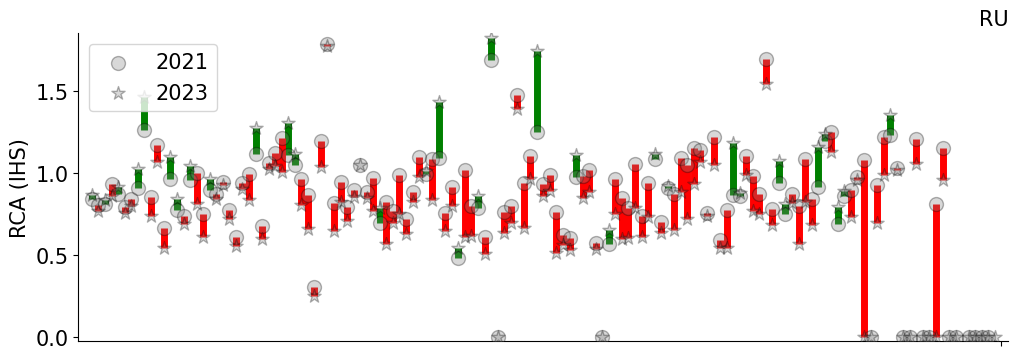

In [359]:
yvalues='ihs_rca'
x_categories= 'language'
CC='RU'
fontsize=15
dfc = df[df["iso2_code"]==CC]
years=[2021,2023]

mm=dfc[dfc['year'].isin(years)].groupby('language')[yvalues].agg(['min','max']).reset_index()
chg=dict(dfc[dfc['year'].isin(years)].groupby(['language','year']).rca.mean().unstack(1).diff(axis=1)[2023]>0)
mm['chg']=mm['language'].map(chg)
pos = mm[mm['chg']==True]
neg = mm[mm['chg']==False]

fig, ax = plt.subplots(1,1, figsize=(12,4))

for y in years:
    if y ==2021:
        shape='o'
        color='grey'
        label='2021'
    elif y == 2022:
        shape = 'v'
        color='grey'
        label='2022'
        s=70
    else:
        shape = '*'
        color='grey'
        label='2023'
        s=100
    dfcy = dfc[dfc['year']==y]
    dfcy = dfcy.set_index(x_categories).reindex(ubiquity_order).reset_index()

    ax.scatter(dfcy[x_categories], dfcy[yvalues], color=color, marker=shape,
               s=s, zorder=4,edgecolors='black',alpha=.3,label=label)


ax.vlines(pos['language'], ymin=pos['min'], ymax=pos['max'],color='green',linewidth=5)
ax.vlines(neg['language'], ymin=neg['min'], ymax=neg['max'],color='red',linewidth=5)
ax.set_title(CC,size=fontsize,loc='right')
#ax.tick_params("x", labelsize=(fontsize-10), rotation=90)
ax.set_xticks(ticks='')
ax.tick_params("y", labelsize=(fontsize))
ax.margins(0.015, tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("RCA (IHS)", size=fontsize)
plt.legend(loc='upper left',prop={'size':15})



In [6]:
np.arcsinh(1)

0.881373587019543

Text(0, 0.5, 'RCA (IHS)')

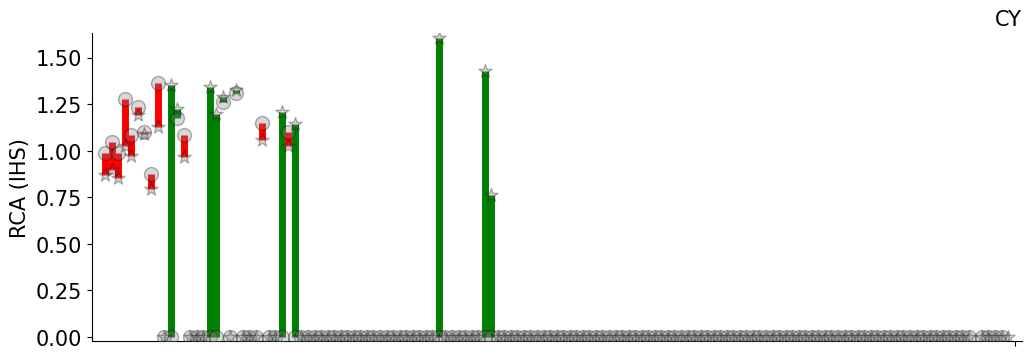

In [360]:
yvalues='ihs_rca'
x_categories= 'language'
CC='CY'
fontsize=15
dfc = df[df["iso2_code"]==CC]
years=[2021,2023]

mm=dfc[dfc['year'].isin(years)].groupby('language')[yvalues].agg(['min','max']).reset_index()
chg=dict(dfc[dfc['year'].isin(years)].groupby(['language','year']).rca.mean().unstack(1).diff(axis=1)[2023]>0)
mm['chg']=mm['language'].map(chg)
pos = mm[mm['chg']==True]
neg = mm[mm['chg']==False]

fig, ax = plt.subplots(1,1, figsize=(12,4))

for y in years:
    if y ==2021:
        shape='o'
        color='grey'
        label='2021'
    elif y == 2022:
        shape = 'v'
        color='grey'
        label='2022'
        s=70
    else:
        shape = '*'
        color='grey'
        label='2023'
        s=100
    dfcy = dfc[dfc['year']==y]
    dfcy = dfcy.set_index(x_categories).reindex(ubiquity_order).reset_index()

    ax.scatter(dfcy[x_categories], dfcy[yvalues], color=color, marker=shape,
               s=s, zorder=4,edgecolors='black',alpha=.3,label=label)


ax.vlines(pos['language'], ymin=pos['min'], ymax=pos['max'],color='green',linewidth=5)
ax.vlines(neg['language'], ymin=neg['min'], ymax=neg['max'],color='red',linewidth=5)
ax.set_title(CC,size=fontsize,loc='right')
#ax.tick_params("x", labelsize=(fontsize-10), rotation=90)
ax.set_xticks(ticks='')
ax.tick_params("y", labelsize=(fontsize))
ax.margins(0.015, tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("RCA (IHS)", size=fontsize)
#plt.legend(loc='upper left',prop={'size':15})



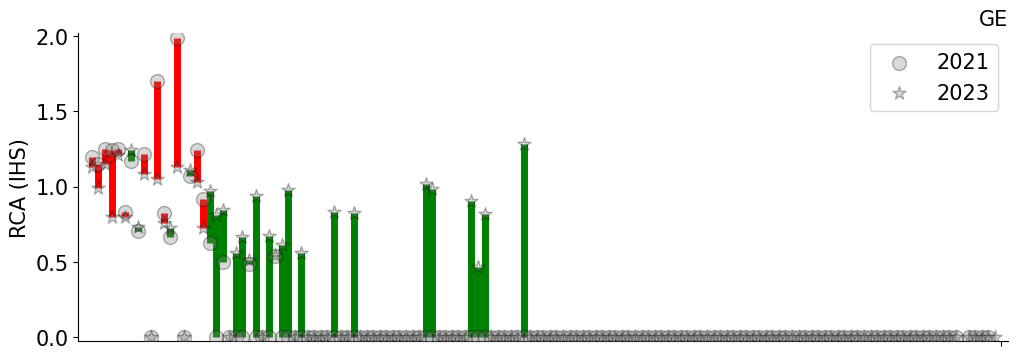

In [361]:
yvalues='ihs_rca'
x_categories= 'language'
CC='GE'
fontsize=15
dfc = df[df["iso2_code"]==CC]
years=[2021,2023]

mm=dfc[dfc['year'].isin(years)].groupby('language')[yvalues].agg(['min','max']).reset_index()
chg=dict(dfc[dfc['year'].isin(years)].groupby(['language','year']).rca.mean().unstack(1).diff(axis=1)[2023]>0)
mm['chg']=mm['language'].map(chg)
pos = mm[mm['chg']==True]
neg = mm[mm['chg']==False]

fig, ax = plt.subplots(1,1, figsize=(12,4))

for y in years:
    if y ==2021:
        shape='o'
        color='grey'
        label='2021'
    elif y == 2022:
        shape = 'v'
        color='grey'
        label='2022'
        s=70
    else:
        shape = '*'
        color='grey'
        label='2023'
        s=100
    dfcy = dfc[dfc['year']==y]
    dfcy = dfcy.set_index(x_categories).reindex(ubiquity_order).reset_index()

    ax.scatter(dfcy[x_categories], dfcy[yvalues], color=color, marker=shape,
               s=s, zorder=4,edgecolors='black',alpha=.3,label=label)

ax.vlines(pos['language'], ymin=pos['min'], ymax=pos['max'],color='green',linewidth=5)
ax.vlines(neg['language'], ymin=neg['min'], ymax=neg['max'],color='red',linewidth=5)
ax.set_title(CC,size=fontsize,loc='right')
#ax.tick_params("x", labelsize=(fontsize-10), rotation=90)
ax.set_xticks(ticks='')
ax.tick_params("y", labelsize=(fontsize))
ax.margins(0.015, tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("RCA (IHS)", size=fontsize)
plt.legend(loc='upper right',prop={'size':15})



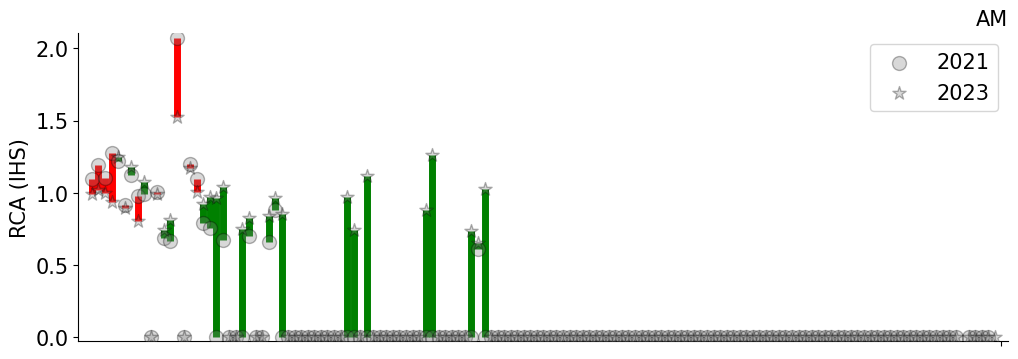

In [362]:
yvalues='ihs_rca'
x_categories= 'language'
CC='AM'
fontsize=15
dfc = df[df["iso2_code"]==CC]
years=[2021,2023]

mm=dfc[dfc['year'].isin(years)].groupby('language')[yvalues].agg(['min','max']).reset_index()
chg=dict(dfc[dfc['year'].isin(years)].groupby(['language','year']).rca.mean().unstack(1).diff(axis=1)[2023]>0)
mm['chg']=mm['language'].map(chg)
pos = mm[mm['chg']==True]
neg = mm[mm['chg']==False]

fig, ax = plt.subplots(1,1, figsize=(12,4))

for y in years:
    if y ==2021:
        shape='o'
        color='grey'
        label='2021'
    elif y == 2022:
        shape = 'v'
        color='grey'
        label='2022'
        s=70
    else:
        shape = '*'
        color='grey'
        label='2023'
        s=100
    dfcy = dfc[dfc['year']==y]
    dfcy = dfcy.set_index(x_categories).reindex(ubiquity_order).reset_index()

    ax.scatter(dfcy[x_categories], dfcy[yvalues], color=color, marker=shape,
               s=s, zorder=4,edgecolors='black',alpha=.3,label=label)

ax.vlines(pos['language'], ymin=pos['min'], ymax=pos['max'],color='green',linewidth=5)
ax.vlines(neg['language'], ymin=neg['min'], ymax=neg['max'],color='red',linewidth=5)
ax.set_title(CC,size=fontsize,loc='right')
#ax.tick_params("x", labelsize=(fontsize-10), rotation=90)
ax.set_xticks(ticks='')
ax.tick_params("y", labelsize=(fontsize))
ax.margins(0.015, tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("RCA (IHS)", size=fontsize)
plt.legend(loc='upper right',prop={'size':15})



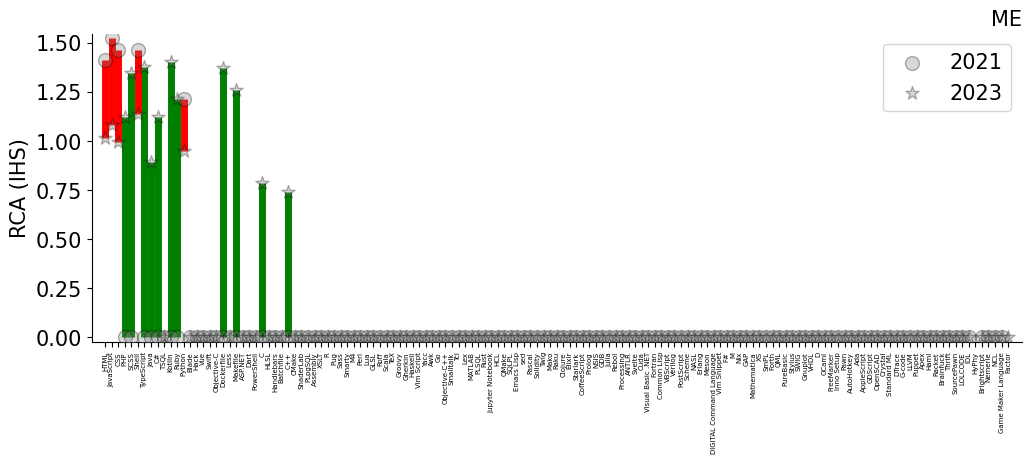

In [363]:
yvalues='ihs_rca'
x_categories= 'language'
CC='ME'
fontsize=15
dfc = df[df["iso2_code"]==CC]
years=[2021,2023]

mm=dfc[dfc['year'].isin(years)].groupby('language')[yvalues].agg(['min','max']).reset_index()
chg=dict(dfc[dfc['year'].isin(years)].groupby(['language','year']).rca.mean().unstack(1).diff(axis=1)[2023]>0)
mm['chg']=mm['language'].map(chg)
pos = mm[mm['chg']==True]
neg = mm[mm['chg']==False]

fig, ax = plt.subplots(1,1, figsize=(12,4))

for y in years:
    if y ==2021:
        shape='o'
        color='grey'
        label='2021'
    elif y == 2022:
        shape = 'v'
        color='grey'
        label='2022'
        s=70
    else:
        shape = '*'
        color='grey'
        label='2023'
        s=100
    dfcy = dfc[dfc['year']==y]
    dfcy = dfcy.set_index(x_categories).reindex(ubiquity_order).reset_index()

    ax.scatter(dfcy[x_categories], dfcy[yvalues], color=color, marker=shape,
               s=s, zorder=4,edgecolors='black',alpha=.3,label=label)

ax.vlines(pos['language'], ymin=pos['min'], ymax=pos['max'],color='green',linewidth=5)
ax.vlines(neg['language'], ymin=neg['min'], ymax=neg['max'],color='red',linewidth=5)
ax.set_title(CC,size=fontsize,loc='right')
ax.tick_params("x", labelsize=(fontsize-10), rotation=90)
ax.tick_params("y", labelsize=(fontsize))
ax.margins(0.015, tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("RCA (IHS)", size=fontsize)
plt.legend(loc='upper right',prop={'size':15})



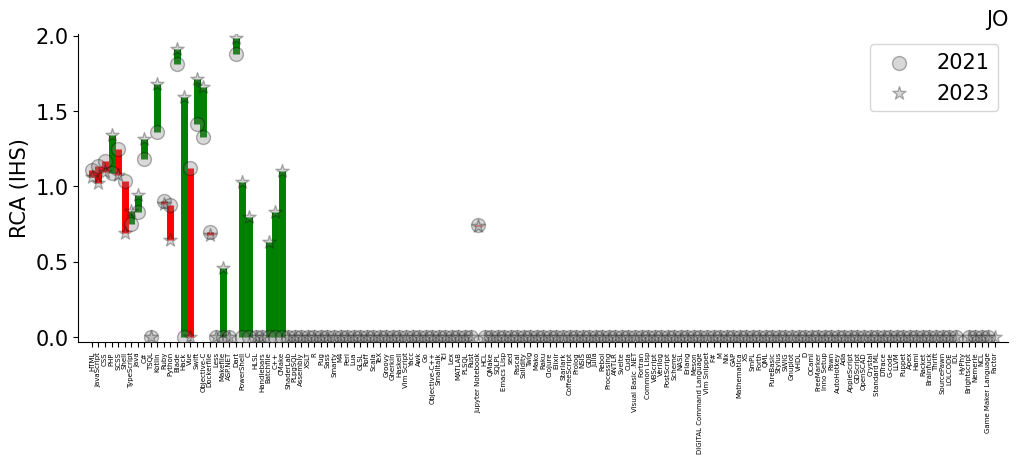

In [383]:
yvalues='ihs_rca'
x_categories= 'language'
CC='JO'
fontsize=15
dfc = df[df["iso2_code"]==CC]
years=[2021,2023]

mm=dfc[dfc['year'].isin(years)].groupby('language')[yvalues].agg(['min','max']).reset_index()
chg=dict(dfc[dfc['year'].isin(years)].groupby(['language','year']).rca.mean().unstack(1).diff(axis=1)[2023]>0)
mm['chg']=mm['language'].map(chg)
pos = mm[mm['chg']==True]
neg = mm[mm['chg']==False]

fig, ax = plt.subplots(1,1, figsize=(12,4))

for y in years:
    if y ==2021:
        shape='o'
        color='grey'
        label='2021'
    elif y == 2022:
        shape = 'v'
        color='grey'
        label='2022'
        s=70
    else:
        shape = '*'
        color='grey'
        label='2023'
        s=100
    dfcy = dfc[dfc['year']==y]
    dfcy = dfcy.set_index(x_categories).reindex(ubiquity_order).reset_index()

    ax.scatter(dfcy[x_categories], dfcy[yvalues], color=color, marker=shape,
               s=s, zorder=4,edgecolors='black',alpha=.3,label=label)

ax.vlines(pos['language'], ymin=pos['min'], ymax=pos['max'],color='green',linewidth=5)
ax.vlines(neg['language'], ymin=neg['min'], ymax=neg['max'],color='red',linewidth=5)
ax.set_title(CC,size=fontsize,loc='right')
ax.tick_params("x", labelsize=(fontsize-10), rotation=90)
ax.tick_params("y", labelsize=(fontsize))
ax.margins(0.015, tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("RCA (IHS)", size=fontsize)
plt.legend(loc='upper right',prop={'size':15})



In [376]:
df[df['year']==2021].drop_duplicates('iso2_code').sort_values('eci').head(80).tail(50)

,iso2_code,language,num_pushers,period,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca,year,ihs_rca
35763,OM,ANTLR,0,1,6,19,0,-0.779296,2.266022,0.008510,-0.767532,1.168798,0.0,2021,0.0
39559,SY,ANTLR,0,1,12,19,0,-0.770172,2.266022,0.011990,-0.690883,1.192334,0.0,2021,0.0
24375,CI,ANTLR,0,1,9,19,0,-0.760088,2.266022,0.010433,-0.772796,1.182033,0.0,2021,0.0
21017,AO,ANTLR,0,1,8,19,0,-0.759172,2.266022,0.009839,-0.783193,1.178743,0.0,2021,0.0
41895,YE,ANTLR,0,1,7,19,0,-0.754902,2.266022,0.009953,-0.776959,1.174809,0.0,2021,0.0
33573,MN,ANTLR,0,1,9,19,0,-0.743119,2.266022,0.011401,-0.757468,1.185253,0.0,2021,0.0
27733,GH,ANTLR,0,1,14,19,0,-0.742919,2.266022,0.012813,-0.573211,1.199252,0.0,2021,0.0
34011,MU,ANTLR,0,1,8,19,0,-0.742218,2.266022,0.011189,-0.761596,1.180081,0.0,2021,0.0
37223,QA,ANTLR,0,1,7,19,0,-0.732187,2.266022,0.010510,-0.769989,1.176350,0.0,2021,0.0
42333,ZW,ANTLR,0,1,9,19,0,-0.728048,2.266022,0.012751,-0.735638,1.186590,0.0,2021,0.0
